In [3]:
import pandas as pd

In [4]:
no_metro = pd.read_csv('../Data/clean-metro-sales-aux-exc.csv', low_memory = False)

In [5]:
no_metro.columns

Index(['funding_status', 'school_charter', 'school_magnet', 'school_kipp',
       'school_nlns', 'school_year_round', 'school_charter_ready_promise',
       'teacher_prefix', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 'primary_focus_subject',
       'primary_focus_area', 'resource_type', 'poverty_level', 'grade_level',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'total_donations', 'num_donors', 'eligible_double_your_impact_match',
       'eligible_almost_home_match'],
      dtype='object')

In [6]:
no_metro = no_metro[['funding_status', 'school_charter', 'school_magnet', 'school_year_round', 'school_kipp', 'school_nlns', 'school_charter_ready_promise', 'teacher_prefix', 'teacher_teach_for_america', 'teacher_ny_teaching_fellow', 'poverty_level', 'grade_level', 'total_price_excluding_optional_support', 'total_price_including_optional_support', 'students_reached', 'eligible_double_your_impact_match', 'eligible_almost_home_match']]

In [7]:
X = no_metro.drop('funding_status', axis=1)
y = no_metro['funding_status']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [11]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#To assign KNN, we loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []


for k in range(21, 40, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'k: {k}, Train/Test Score: {train_score}/{test_score}')
 

k: 21, Train/Test Score: 0.7227390162737471/0.6967171681714149
k: 23, Train/Test Score: 0.7216625245135896/0.6977948300313118
k: 25, Train/Test Score: 0.7208235630005102/0.698830368300594
k: 27, Train/Test Score: 0.7198254679228857/0.6997079431050702
k: 29, Train/Test Score: 0.7191339389769584/0.7002976733736783
k: 31, Train/Test Score: 0.7180586173165401/0.7005679664134571
k: 33, Train/Test Score: 0.7176678040036133/0.7011155730914503
k: 35, Train/Test Score: 0.7172009342076319/0.7020142096912341
k: 37, Train/Test Score: 0.7167445953093041/0.7025793678653168
k: 39, Train/Test Score: 0.7162882564109765/0.7031410157401817


ValueError: x and y must have same first dimension, but have shapes (20,) and (10,)

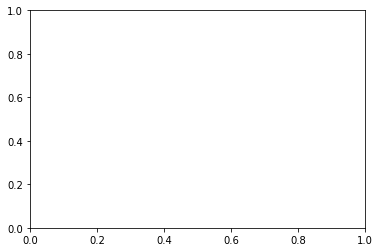

In [12]:
import matplotlib.pyplot as plt   
#You can also plot it if you want to have a look at it
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [13]:
#We predict using the value of k where train and test converge
knn = KNeighborsClassifier(n_neighbors=39)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.703


In [15]:
#Measure model
from sklearn.metrics import mean_squared_error, r2_score

#Predict a value
predicted = knn.predict(X_test)

mse = mean_squared_error(y_test, predicted)

r2 = r2_score(y_test, predicted)
r2

-0.4118217497925518

In [16]:
mse

0.2968589842598183